## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv(r'C:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Dataset\DP3 Historical Data.csv')
df = data.copy()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"61,600","61,500","61,700","61,500",10.51K,0.16%
1,05/30/2024,"61,500","61,000","61,500","60,700",5.11K,0.82%
2,05/29/2024,"61,000","62,000","62,000","61,000",7.30K,0.00%
3,05/28/2024,"61,000","61,000","61,800","60,900",7.90K,0.16%
4,05/27/2024,"60,900","61,700","61,700","60,900",12.67K,-0.16%
...,...,...,...,...,...,...,...
1132,03/07/2019,"76,300","75,000","76,900","74,700",11.57K,2.14%
1133,03/06/2019,"74,700","74,100","75,000","74,000",3.81K,0.40%
1134,03/05/2019,"74,400","75,000","75,000","74,000",7.33K,-0.67%
1135,03/04/2019,"74,900","73,800","75,200","73,800",8.34K,1.49%


## Data preprocessing

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df = df.replace(',', '', regex=True)

In [4]:
# Show Dataframe
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,73800,73000,73900,73000,1.54K,0.54%
2019-03-04,74900,73800,75200,73800,8.34K,1.49%
2019-03-05,74400,75000,75000,74000,7.33K,-0.67%
2019-03-06,74700,74100,75000,74000,3.81K,0.40%
2019-03-07,76300,75000,76900,74700,11.57K,2.14%
...,...,...,...,...,...,...
2024-05-27,60900,61700,61700,60900,12.67K,-0.16%
2024-05-28,61000,61000,61800,60900,7.90K,0.16%
2024-05-29,61000,62000,62000,61000,7.30K,0.00%


## Scale Data

In [5]:
# Select 'Close' column
data = df['Price'].values

In [6]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

## Model 7 : 3

In [7]:
# Define the size of train and test set
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size

# Split the data into train and test sets
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

## Create and add data into X, y

In [8]:
# Function to prepare data for RNN
def add_data(data, sequence_length=30):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [9]:
# Prepare sequences
sequence_length = 30
train_last_windowsize = train_data[-sequence_length:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

In [10]:
# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Build Model

In [11]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training Model

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.6173
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3999
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2457
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2264
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1755
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1547
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1538
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1408
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1261
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1143
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1139
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1009
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0809
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0725
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

## Predict Close price in test  set

In [13]:
# Make predictions
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


## Transform data back to the original

In [14]:
# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

## Calculate the error of the model

In [15]:
# Calculate error metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: {test_mape}")
print(f"RMSE on Test set: {test_rmse}")
print(f"MSLE on Test set: {test_msle}")

MAPE on Test set: 0.04017311872766623
RMSE on Test set: 3065.2612749829686
MSLE on Test set: 0.0026658243745940413


## Predict Close price for 90 next days

In [16]:
# Predict next 30, 60, and 90 days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
y_next_30_days = []
y_next_60_days = []
y_next_90_days = []

for i in range(90):
    next_day_pred = model.predict(last_sequence_days)
    if i < 30:
        y_next_30_days.append(next_day_pred[0][0])
    if i < 60:
        y_next_60_days.append(next_day_pred[0][0])
    y_next_90_days.append(next_day_pred[0][0])
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [17]:
# Inverse transform the predictions
y_next_30_days = scaler.inverse_transform(np.array(y_next_30_days).reshape(-1, 1)).flatten()
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1)).flatten()
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1)).flatten()

In [18]:
# Print the predicted values
print("Predicted next 30 days:")
print(y_next_30_days)
print("\nPredicted next 60 days:")
print(y_next_60_days)
print("\nPredicted next 90 days:")
print(y_next_90_days)

Predicted next 30 days:
[ 61206.367  61297.434  61279.9    61614.895  61919.68   62462.28
  63555.72   64377.496  65397.758  66654.35   67810.83   68954.09
  70180.     71653.08   73133.38   74608.2    76310.4    77937.69
  79749.44   81843.42   83878.195  86043.086  88441.7    90867.44
  93410.63   96167.23   99047.56  102044.36  105075.26  108106.01 ]

Predicted next 60 days:
[ 61206.367  61297.434  61279.9    61614.895  61919.68   62462.28
  63555.72   64377.496  65397.758  66654.35   67810.83   68954.09
  70180.     71653.08   73133.38   74608.2    76310.4    77937.69
  79749.44   81843.42   83878.195  86043.086  88441.7    90867.44
  93410.63   96167.23   99047.56  102044.36  105075.26  108106.01
 110980.77  113692.68  116280.25  118669.234 120809.63  122813.27
 124650.625 126249.516 127670.89  128935.805 130034.93  130956.41
 131785.77  132540.8   133155.42  133702.27  134191.66  134555.05
 134860.64  135089.25  135195.62  135216.77  135165.39  135052.62
 134902.84  134757.8   13

## Model visualization

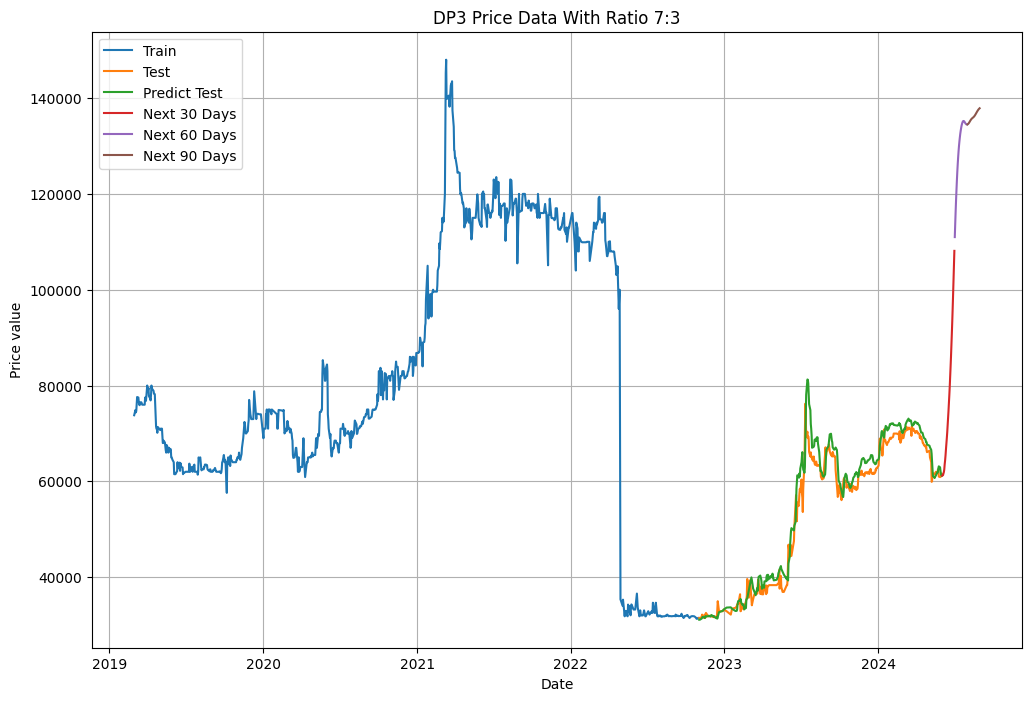

In [19]:
# Create DataFrames for plotting
train_data_df = pd.DataFrame(train_data, index=df.index[:train_size], columns=['Price'])
test_data_df = pd.DataFrame(test_data, index=df.index[train_size:], columns=['Price'])
y_pred_df = pd.DataFrame(y_pred, index=df.index[train_size:], columns=['Predict Test'])
next_30_days_df = pd.DataFrame(y_next_30_days, index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30), columns=['Next 30 Days'])
next_60_days_df = pd.DataFrame(y_next_60_days[30:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=31), periods=30), columns=['Next 60 Days'])
next_90_days_df = pd.DataFrame(y_next_90_days[60:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=61), periods=30), columns=['Next 90 Days'])
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_df.index, train_data_df['Price'], label='Train')
plt.plot(test_data_df.index, test_data_df['Price'], label='Test')
plt.plot(y_pred_df.index, y_pred_df['Predict Test'], label='Predict Test')
plt.plot(next_30_days_df.index, next_30_days_df['Next 30 Days'], label='Next 30 Days')
plt.plot(next_60_days_df.index, next_60_days_df['Next 60 Days'], label='Next 60 Days')
plt.plot(next_90_days_df.index, next_90_days_df['Next 90 Days'], label='Next 90 Days')
plt.legend()
plt.grid()
plt.title("DP3 Price Data With Ratio 7:3")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('RNN_73_DP3.png')
plt.show()

## Model 8 : 2

In [20]:
data = pd.read_csv(r'C:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Dataset\DP3 Historical Data.csv')
df = data.copy()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"61,600","61,500","61,700","61,500",10.51K,0.16%
1,05/30/2024,"61,500","61,000","61,500","60,700",5.11K,0.82%
2,05/29/2024,"61,000","62,000","62,000","61,000",7.30K,0.00%
3,05/28/2024,"61,000","61,000","61,800","60,900",7.90K,0.16%
4,05/27/2024,"60,900","61,700","61,700","60,900",12.67K,-0.16%
...,...,...,...,...,...,...,...
1132,03/07/2019,"76,300","75,000","76,900","74,700",11.57K,2.14%
1133,03/06/2019,"74,700","74,100","75,000","74,000",3.81K,0.40%
1134,03/05/2019,"74,400","75,000","75,000","74,000",7.33K,-0.67%
1135,03/04/2019,"74,900","73,800","75,200","73,800",8.34K,1.49%


In [21]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df = df.replace(',', '', regex=True)
# df['Price'] = df['Price'].fillna(method='ffill')

In [22]:
# Select 'Close' column
data = df['Price'].values

In [23]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [24]:
# Define the size of train and test set
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

# Split the data into train and test sets
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [25]:
# Function to prepare data for RNN
def add_data(data, sequence_length=30):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [26]:
# Prepare sequences
sequence_length = 30
train_last_windowsize = train_data[-sequence_length:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

In [27]:
# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3722
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2327
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1778
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1756
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1385
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1033
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0758
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0785
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0642
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0530
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0530
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0504
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0450
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0416
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

In [30]:
# Make predictions
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step


In [31]:
# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

In [32]:
# Calculate error metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: {test_mape}")
print(f"RMSE on Test set: {test_rmse}")
print(f"MSLE on Test set: {test_msle}")

MAPE on Test set: 0.02767930526667808
RMSE on Test set: 2855.3748240608015
MSLE on Test set: 0.0018405207543494464


In [33]:
# Predict next 30, 60, and 90 days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
y_next_30_days = []
y_next_60_days = []
y_next_90_days = []

for i in range(90):
    next_day_pred = model.predict(last_sequence_days)
    if i < 30:
        y_next_30_days.append(next_day_pred[0][0])
    if i < 60:
        y_next_60_days.append(next_day_pred[0][0])
    y_next_90_days.append(next_day_pred[0][0])
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [34]:
# Inverse transform the predictions
y_next_30_days = scaler.inverse_transform(np.array(y_next_30_days).reshape(-1, 1)).flatten()
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1)).flatten()
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1)).flatten()

In [35]:
# Print the predicted values
print("Predicted next 30 days:")
print(y_next_30_days)
print("\nPredicted next 60 days:")
print(y_next_60_days)
print("\nPredicted next 90 days:")
print(y_next_90_days)

Predicted next 30 days:
[61428.42  61418.902 61457.363 61608.926 61839.062 62273.125 62719.64
 62924.25  63390.07  63857.613 64307.16  64975.004 65588.15  66203.945
 66862.836 67533.13  68210.63  68942.91  69834.83  70751.56  71670.945
 72642.16  73626.77  74683.44  75821.94  77018.35  78278.27  79602.555
 81001.62  82469.81 ]

Predicted next 60 days:
[ 61428.42   61418.902  61457.363  61608.926  61839.062  62273.125
  62719.64   62924.25   63390.07   63857.613  64307.16   64975.004
  65588.15   66203.945  66862.836  67533.13   68210.63   68942.91
  69834.83   70751.56   71670.945  72642.16   73626.77   74683.44
  75821.94   77018.35   78278.27   79602.555  81001.62   82469.81
  84017.9    85675.83   87433.7    89296.47   91285.86   93397.81
  95651.17   98058.61  100633.02  103372.94  106262.92  109284.4
 112389.54  115526.98  118632.56  121622.33  124413.12  126934.24
 129136.96  130993.016 132502.36  133687.9   134584.47  135238.61
 135699.5   136011.66  136215.23  136344.98  136426

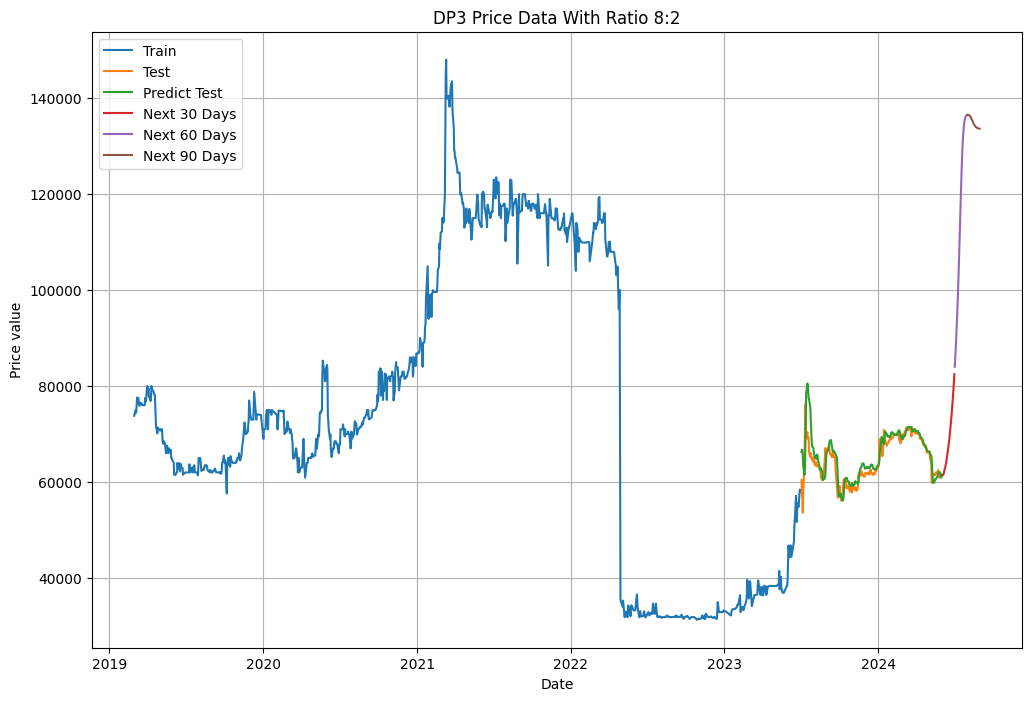

In [36]:
# Create DataFrames for plotting
train_data_df = pd.DataFrame(train_data, index=df.index[:train_size], columns=['Price'])
test_data_df = pd.DataFrame(test_data, index=df.index[train_size:], columns=['Price'])
y_pred_df = pd.DataFrame(y_pred, index=df.index[train_size:], columns=['Predict Test'])
next_30_days_df = pd.DataFrame(y_next_30_days, index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30), columns=['Next 30 Days'])
next_60_days_df = pd.DataFrame(y_next_60_days[30:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=31), periods=30), columns=['Next 60 Days'])
next_90_days_df = pd.DataFrame(y_next_90_days[60:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=61), periods=30), columns=['Next 90 Days'])
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_df.index, train_data_df['Price'], label='Train')
plt.plot(test_data_df.index, test_data_df['Price'], label='Test')
plt.plot(y_pred_df.index, y_pred_df['Predict Test'], label='Predict Test')
plt.plot(next_30_days_df.index, next_30_days_df['Next 30 Days'], label='Next 30 Days')
plt.plot(next_60_days_df.index, next_60_days_df['Next 60 Days'], label='Next 60 Days')
plt.plot(next_90_days_df.index, next_90_days_df['Next 90 Days'], label='Next 90 Days')
plt.legend()
plt.grid()
plt.title("DP3 Price Data With Ratio 8:2")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('RNN_82_DP3.png')
plt.show()

## Model 9 : 1

In [37]:
data = pd.read_csv(r'C:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Dataset\DP3 Historical Data.csv')
df = data.copy()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"61,600","61,500","61,700","61,500",10.51K,0.16%
1,05/30/2024,"61,500","61,000","61,500","60,700",5.11K,0.82%
2,05/29/2024,"61,000","62,000","62,000","61,000",7.30K,0.00%
3,05/28/2024,"61,000","61,000","61,800","60,900",7.90K,0.16%
4,05/27/2024,"60,900","61,700","61,700","60,900",12.67K,-0.16%
...,...,...,...,...,...,...,...
1132,03/07/2019,"76,300","75,000","76,900","74,700",11.57K,2.14%
1133,03/06/2019,"74,700","74,100","75,000","74,000",3.81K,0.40%
1134,03/05/2019,"74,400","75,000","75,000","74,000",7.33K,-0.67%
1135,03/04/2019,"74,900","73,800","75,200","73,800",8.34K,1.49%


In [38]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df = df.replace(',', '', regex=True)
# df['Price'] = df['Price'].fillna(method='ffill')

In [39]:
# Select 'Close' column
data = df['Price'].values

In [40]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [41]:
# Define the size of train and test set
train_size = int(len(data_scaled) * 0.9)
test_size = len(data_scaled) - train_size

# Split the data into train and test sets
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [42]:
# Function to prepare data for RNN
def add_data(data, sequence_length=30):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [43]:
# Prepare sequences
sequence_length = 30
train_last_windowsize = train_data[-sequence_length:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

In [44]:
# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [45]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.7284
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3968
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2886
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2464
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2047
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1710
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1317
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1133
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1254
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1056
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0875
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0794
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0697
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0707
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - lo

In [47]:
# Make predictions
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


In [48]:
# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

In [49]:
# Calculate error metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: {test_mape}")
print(f"RMSE on Test set: {test_rmse}")
print(f"MSLE on Test set: {test_msle}")

MAPE on Test set: 0.03193763385686969
RMSE on Test set: 2327.7003585318403
MSLE on Test set: 0.0011696904205978611


In [50]:
# Predict next 30, 60, and 90 days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
y_next_30_days = []
y_next_60_days = []
y_next_90_days = []

for i in range(90):
    next_day_pred = model.predict(last_sequence_days)
    if i < 30:
        y_next_30_days.append(next_day_pred[0][0])
    if i < 60:
        y_next_60_days.append(next_day_pred[0][0])
    y_next_90_days.append(next_day_pred[0][0])
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [51]:
# Inverse transform the predictions
y_next_30_days = scaler.inverse_transform(np.array(y_next_30_days).reshape(-1, 1)).flatten()
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1)).flatten()
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1)).flatten()

In [52]:
# Print the predicted values
print("Predicted next 30 days:")
print(y_next_30_days)
print("\nPredicted next 60 days:")
print(y_next_60_days)
print("\nPredicted next 90 days:")
print(y_next_90_days)

Predicted next 30 days:
[ 62748.586  63431.746  64182.7    64932.324  65729.55   66676.11
  67579.586  68677.11   70028.266  71427.81   73030.45   74418.36
  75866.695  77546.055  79245.95   81033.96   82838.71   84734.25
  86762.14   88778.27   90851.055  92958.43   95193.96   97459.84
  99679.69  101958.79  104256.54  106515.49  108794.305 110988.07 ]

Predicted next 60 days:
[ 62748.586  63431.746  64182.7    64932.324  65729.55   66676.11
  67579.586  68677.11   70028.266  71427.81   73030.45   74418.36
  75866.695  77546.055  79245.95   81033.96   82838.71   84734.25
  86762.14   88778.27   90851.055  92958.43   95193.96   97459.84
  99679.69  101958.79  104256.54  106515.49  108794.305 110988.07
 113195.914 115343.71  117442.85  119474.02  121424.58  123307.32
 125090.016 126777.25  128377.81  129884.28  131312.11  132633.25
 133855.75  134997.06  136049.3   137017.02  137903.33  138713.98
 139461.3   140138.31  140756.61  141316.05  141826.86  142291.86
 142711.05  143091.48  14

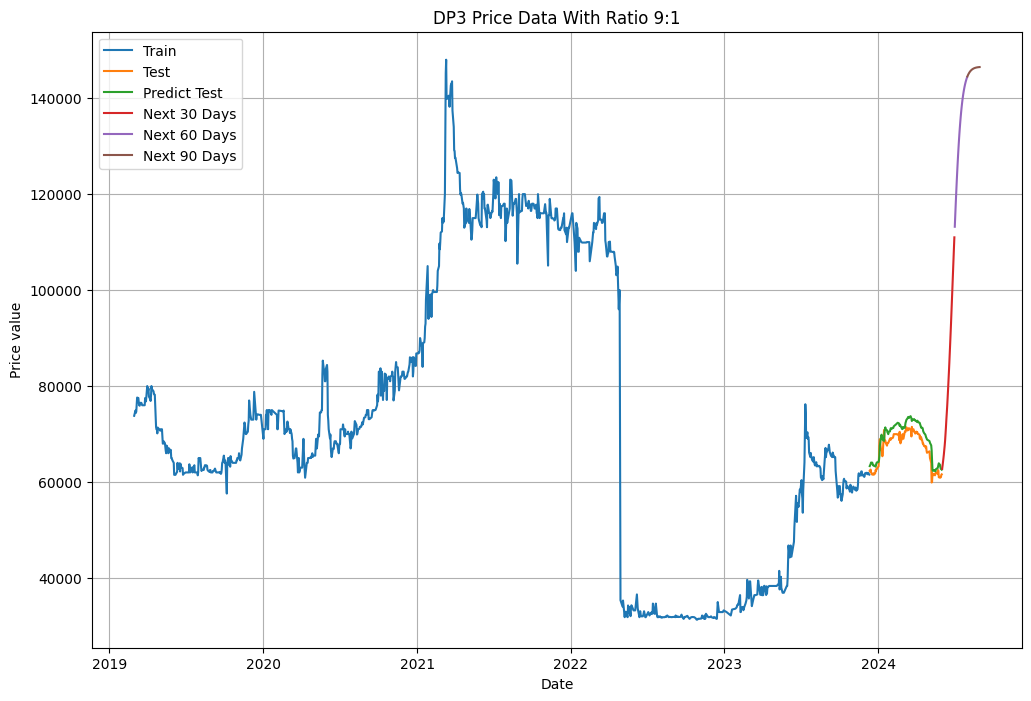

In [53]:
# Create DataFrames for plotting
train_data_df = pd.DataFrame(train_data, index=df.index[:train_size], columns=['Price'])
test_data_df = pd.DataFrame(test_data, index=df.index[train_size:], columns=['Price'])
y_pred_df = pd.DataFrame(y_pred, index=df.index[train_size:], columns=['Predict Test'])
next_30_days_df = pd.DataFrame(y_next_30_days, index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30), columns=['Next 30 Days'])
next_60_days_df = pd.DataFrame(y_next_60_days[30:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=31), periods=30), columns=['Next 60 Days'])
next_90_days_df = pd.DataFrame(y_next_90_days[60:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=61), periods=30), columns=['Next 90 Days'])
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_df.index, train_data_df['Price'], label='Train')
plt.plot(test_data_df.index, test_data_df['Price'], label='Test')
plt.plot(y_pred_df.index, y_pred_df['Predict Test'], label='Predict Test')
plt.plot(next_30_days_df.index, next_30_days_df['Next 30 Days'], label='Next 30 Days')
plt.plot(next_60_days_df.index, next_60_days_df['Next 60 Days'], label='Next 60 Days')
plt.plot(next_90_days_df.index, next_90_days_df['Next 90 Days'], label='Next 90 Days')
plt.legend()
plt.grid()
plt.title("DP3 Price Data With Ratio 9:1")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('RNN_91_DP3.png')
plt.show()